## KNN

> KNeighborClassifier / kNeighborRegressor

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

### 최근접이웃 분류(KNeighborClassifier)

- param: n_neighbor= 로 조절함

- neighbor 수가 너무 많으면 -> 뭉그러짐, 모델 단순해서 과소적합

- neighbor 수가 너무 작으면 -> 과대적합 위험 있으므로 중간정도 적절히 선택 필요

X.shape: (26, 2)


c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  func(*args, **kwargs)
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


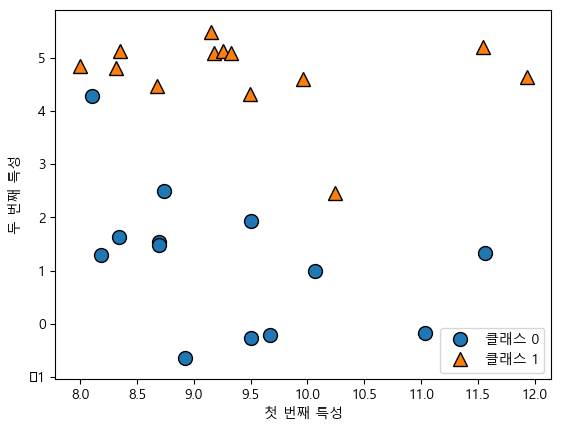

In [14]:
X, y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.rcParams["font.family"]='Malgun Gothic'
plt.legend(["클래스 0","클래스 1"], loc=4)
plt.xlabel("첫 번째 특성")
plt.ylabel("두 번째 특성")
print("X.shape:" ,X.shape)

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  func(*args, **kwargs)
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


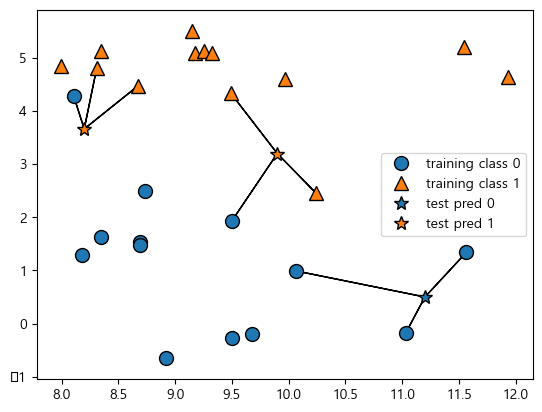

In [15]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [16]:
from sklearn.model_selection import train_test_split
X, y=mglearn.datasets.make_forge()
#mglearn 데이터셋에서 x,y정하고 train 과 test로 나누어줌
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [17]:
from sklearn.neighbors import KNeighborsClassifier
#knn중에서 classify 분류하는 그래프라서.
clf=KNeighborsClassifier(n_neighbors=3)

In [18]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [19]:
clf.predict(X_test)

array([1, 0, 1, 0, 1, 0, 0])

In [20]:
clf.score(X_test, y_test)

0.8571428571428571

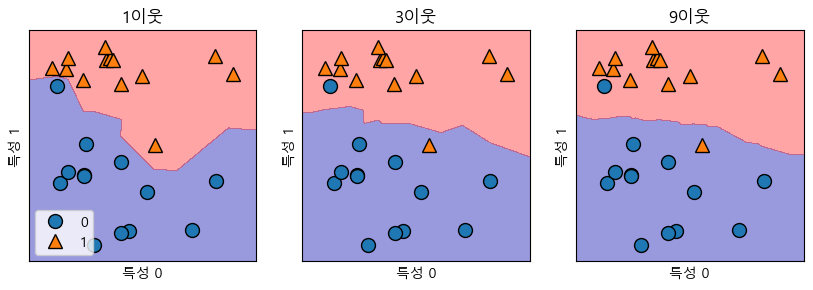

In [23]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1,3,9], axes): #앞에 array랑 axes랑 대응하는데 위에 1행3열의 subplots마다 neighbors이 1,3,9 당 하나의 ax
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y) #n_neighbors 초기화하고 훈련
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4) #fill=True로 경계 채우고 eps로 해상도 조절
    #ax=는 결정경계를 그릴 축을 설정해줘야하는데 이 축 ax=ax
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    ax.set_title("{}이웃".format(n_neighbors))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend(loc=3) #axes[0] 즉 0번째 ax에 범례추가, loc lower left

### 최근접 이웃 회귀(KNeighborsRegressor)

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  func(*args, **kwargs)
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


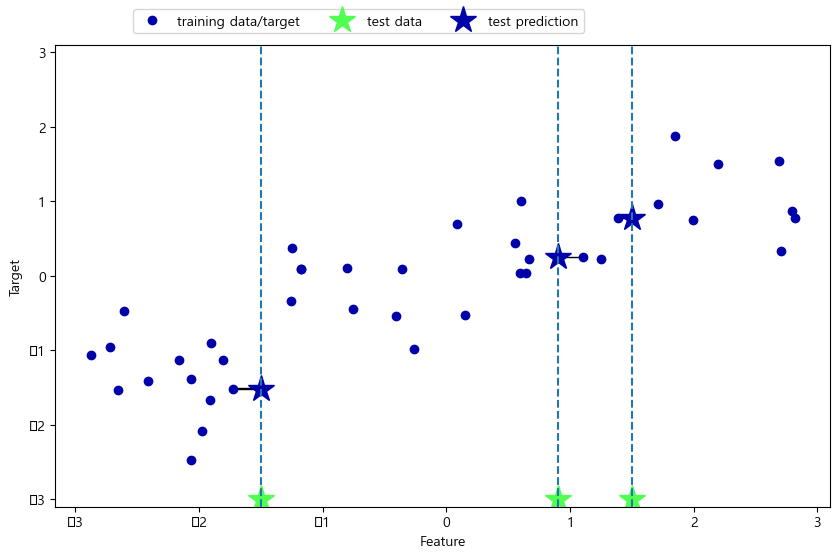

In [24]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  func(*args, **kwargs)
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


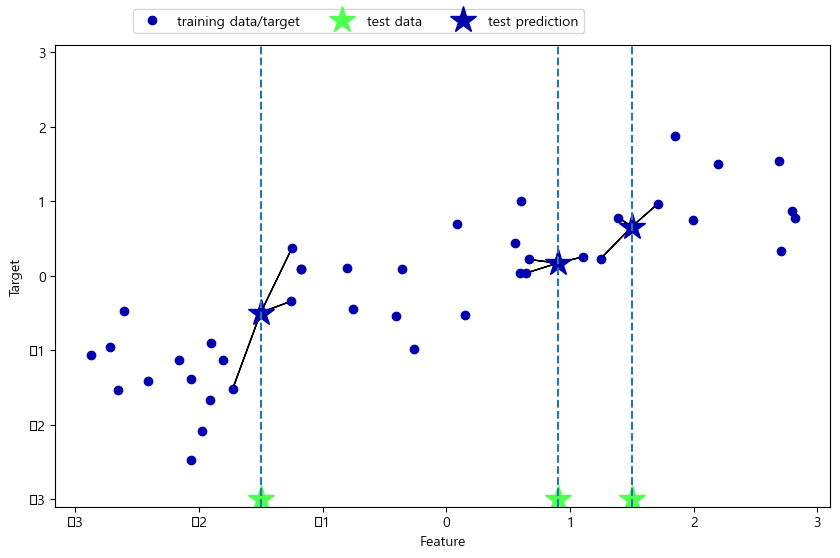

In [25]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

#결과해석 - 이웃3개일때, 이웃간의 평균자리가 예측데이터로 예상되는것을 볼수있음 

In [28]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

X, y=mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
reg=KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [30]:
reg.predict(X_test) #나의 실수 y_test까지 predict에 넣었는데 그럴수가 없잖아 

array([-0.05396539,  0.35686046,  1.13671923, -1.89415682, -1.13881398,
       -1.63113382,  0.35686046,  0.91241374, -0.44680446, -1.13881398])

In [31]:
reg.score(X_test, y_test)

#score 메서드는 회귀모델에서는 R^2값을 반환하는데 1에 가까울수록 오차 적다는것 경사하강법 통해서 알고 있음.

0.8344172446249605

### 선형 회귀


In [33]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr=LinearRegression().fit(X_train, y_train)

In [34]:
lr.coef_
#y=wx+b 선형회귀에서 w라는 가중치(계수)를 찾아주는 내장함수 coef_
#w1. w2. w3... 이기 때문에 실수가 아니고 array로 반환됨 

array([0.44153666])

In [35]:
lr.intercept_
#b.절편.파라미터.

np.float64(-0.01711124414733381)

In [36]:
print(lr.score(X_train, y_train), lr.score(X_test, y_test))

#훈련과 테스트 점수가 매우 비슷하다 -> 훈련 모델이 그렇게 잘 트레이닝되지 않았다... 과소적합이다... 

0.6592061059587275 0.6932519118518163


In [40]:
X, y=mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr=LinearRegression().fit(X_train, y_train)
print(lr.score(X_train, y_train), lr.score(X_test, y_test))
#일부러 엄청 많은 데이터있는 보스턴집값 데이터셋을 불러왔더니 과대적합이네..?ㅎㅎ
#그렇다면 이 과대적합을 선형회귀에서 방지해보자 -> 리지, 라쏘

0.952051960903273 0.6074721959665734


### 선형회귀 모델-리지(Ridge, L2 규제), 라쏘(Lasso, L1 규제)

### 리지 

- alpha : 클수록 규제 강함, 일반화 도움 되지만 성능 나빠짐... 

- alpha (parameter) 조절로 성능 조절 

In [41]:
from sklearn.linear_model import Ridge

ridge=Ridge().fit(X_train, y_train)
print(ridge.score(X_train, y_train), ridge.score(X_test, y_test))
#위에 그냥 선형회귀 썼을때보다 훈련성능은 낮아지지만 테스트성능은 좋아진거 볼 수 있음

0.8857966585170941 0.7527683481744755


In [42]:
ridge10=Ridge(alpha=10).fit(X_train, y_train)
print(ridge10.score(X_train, y_train), ridge10.score(X_test, y_test))
# Ridge의 파라미터는 alpha
# alpha=10은 규제 강도를 크게 한 것, 계수를 0에 가깝게 만듬(모든 특성이 어쨌든 포함됨)


0.7882787115369614 0.635941148917731


In [43]:
ridge1=Ridge(alpha=0.1).fit(X_train, y_train)
print(ridge1.score(X_train, y_train), ridge1.score(X_test, y_test))

0.9282273685001984 0.7722067936480144


### 라소

In [45]:
from sklearn.linear_model import Lasso

lasso=Lasso().fit(X_train, y_train)
print("훈련 세트 점수", lasso.score(X_train, y_train))
print("테스트 세트 점수", lasso.score(X_test, y_test))
print("사용한 특성의 갯수", np.sum(lasso.coef_ != 0))

#그냥 lasso = 결과 매우 처참함 -> 과소적합임을 알 수 있음 

훈련 세트 점수 0.29323768991114596
테스트 세트 점수 0.20937503255272272
사용한 특성의 갯수 4


In [46]:
lasso001=Lasso(alpha=0.01, max_iter=50000).fit(X_train, y_train)
print("훈련 세트 점수", lasso001.score(X_train, y_train))
print("테스트 세트 점수", lasso001.score(X_test, y_test))
print("사용한 특성의 갯수", np.sum(lasso001.coef_ != 0))

# alpha 기본값은 1인데 규제를 약하게 주니까 사용한 특성의 갯수가 많아지면서 성능이 좀 올라감


훈련 세트 점수 0.8962226511086498
테스트 세트 점수 0.7656571174549984
사용한 특성의 갯수 33


In [47]:
lasso00001=Lasso(alpha=0.0001, max_iter=50000).fit(X_train, y_train)
print("훈련 세트 점수", lasso00001.score(X_train, y_train))
print("테스트 세트 점수", lasso00001.score(X_test, y_test))
print("사용한 특성의 갯수", np.sum(lasso00001.coef_ != 0))

#또 규제를 너무 약하게 주니까 과대적합의 낌새가 나는 것을 볼수있음. 

훈련 세트 점수 0.9507158754515461
테스트 세트 점수 0.6437467421273347
사용한 특성의 갯수 96


### 선형 분류 (Linear_model에 속함)

- 둘다 선형 경계를 통하여 클래스를 분류해낸다.

1. 로지스틱 회귀(Logistic regression) - 출력: 특정 클래스에 속할 확률(0과 1 사이)
> 해석 : 각 특성이 확률에 미치는 영향

2. SVC(선형 서포트 벡터 머신) - 출력: 어떤 클래스에 속하는가(확률X)
> 가중치 벡터로 결정 경계 정의 -> 해석 : '어떤' 특성이 중요한가.

- 규제 강도 파라미터(C) - 규제 정도와 반비례

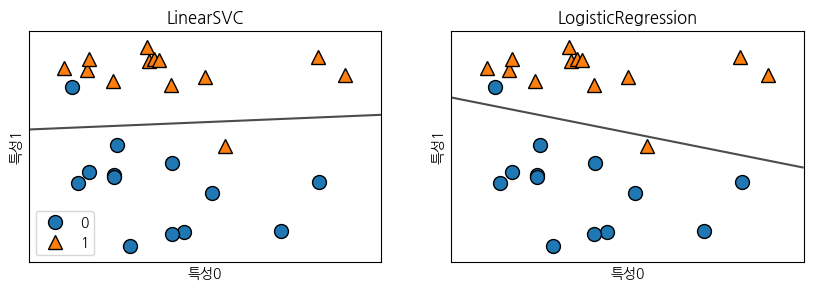

In [3]:
import koreanize_matplotlib
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y=mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(max_iter=5000), LogisticRegression()], axes):
    clf=model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:,0],X[:,1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("특성0")
    ax.set_ylabel("특성1")
axes[0].legend()

In [ ]:
# 결과 해석: 둘다 y가 0이거나 1이거나로 분류하는데, 둘다 2개의 데이터를 잘못 분류하고 있음을 알 수 있음

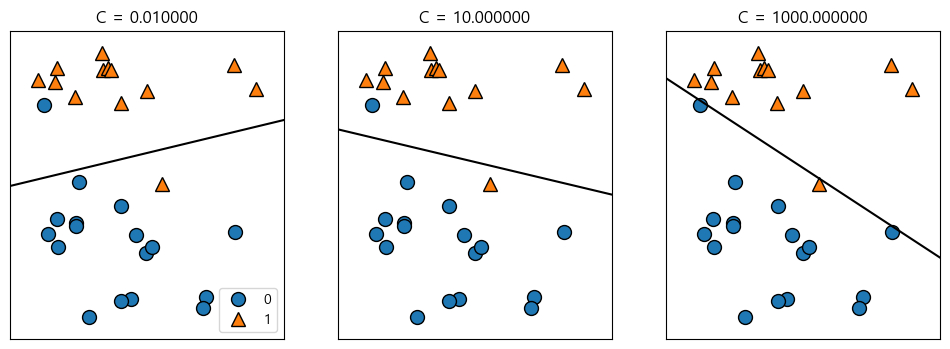

In [50]:
mglearn.plots.plot_linear_svc_regularization()

#svc에 규제먹였을때 결과 보기
#C값 너무 작을 때: 규제 강해서 0에 가까워진 계수가 많아 부드러운 결정 경계가 나옴
#C값 너무 클 때: 규제 약해서 모든 데이터 포인트를 엄격하게 지키려고 하므로 결정 경계가 쪼삣하다 

In [52]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=0)
#랜덤할때도 비율 유지하기 위해 stratify=cancer.target
logreg=LogisticRegression(max_iter=5000).fit(X_train, y_train)
print(logreg.score(X_train, y_train), logreg.score(X_test, y_test))

#로지스틱 회귀 C파라미터 안주고 기본값 C=1일때의 성능 함 봤다.


0.9671361502347418 0.9370629370629371


In [61]:
logreg100=LogisticRegression(C=0.0001, max_iter=5000).fit(X_train, y_train)
print(logreg100.score(X_train, y_train), logreg100.score(X_test, y_test))


0.9342723004694836 0.8951048951048951


### 로지스틱 회귀에 L1 규제 사용

> 모델이 몇 개의 특성만 반영하게 됨(몇 개는 버림)

> 이해하기 쉬움 

C=0.001인 l1 로지스틱 회귀의 훈련 정확도: 0.92
C=0.001인 l1 로지스틱 회귀의 테스트 정확도: 0.92
C=1.000인 l1 로지스틱 회귀의 훈련 정확도: 0.97
C=1.000인 l1 로지스틱 회귀의 테스트 정확도: 0.94
C=100.000인 l1 로지스틱 회귀의 훈련 정확도: 0.99
C=100.000인 l1 로지스틱 회귀의 테스트 정확도: 0.94


c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  func(*args, **kwargs)
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


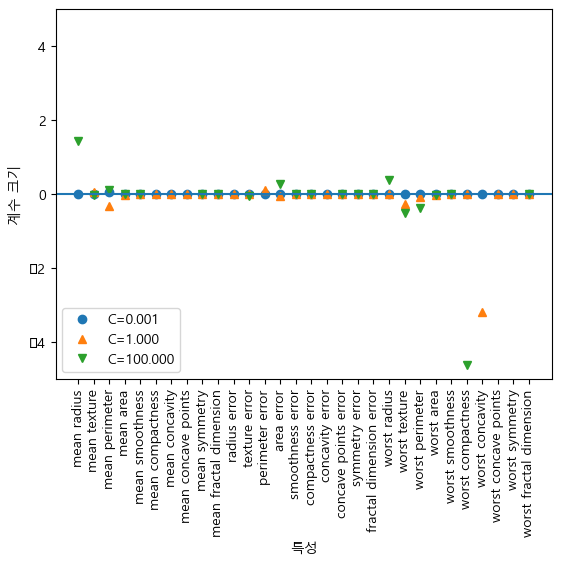

In [69]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1=LogisticRegression(solver='liblinear', C=C, penalty="l1", max_iter=1000).fit(X_train, y_train)
    print("C={:.3f}인 l1 로지스틱 회귀의 훈련 정확도: {:.2f}".format(C, lr_l1.score(X_train, y_train)))
    print("C={:.3f}인 l1 로지스틱 회귀의 테스트 정확도: {:.2f}".format(C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims=plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("특성")
plt.ylabel("계수 크기")

plt.ylim(-5, 5)
plt.legend(loc=3)

### 다중클래스 분류용 선형

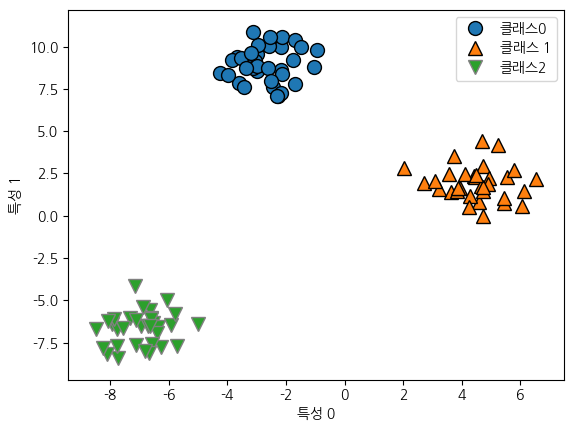

In [5]:
from sklearn.datasets import make_blobs

X, y=make_blobs(random_state=42)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(["클래스0", "클래스 1", "클래스2"])

### SGDClassifier, SGDRegressor

- 앞선 선형 모델들의 대용량 처리 버전

- 대규모, 고차원 데이터셋

In [6]:
#바로앞 다중 분류 데이터셋에 경사하강법 적용해보겠음

from sklearn.linear_model import SGDClassifier

sgd_c=SGDClassifier(alpha=0.01, learning_rate='adaptive', eta0=0.1, random_state=42, n_jobs=1)
sgd_c.fit(X, y)

SGDClassifier(alpha=0.01, eta0=0.1, learning_rate='adaptive', n_jobs=1,
              random_state=42)

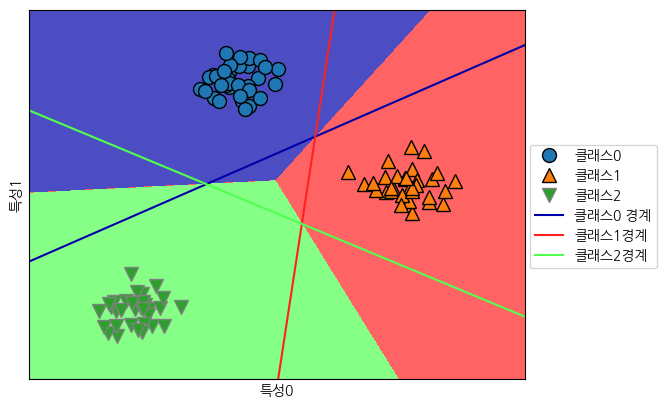

In [7]:
mglearn.plots.plot_2d_classification(sgd_c, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
line=np.linspace(-15, 15)
for coef, intercept, color in zip(sgd_c.coef_, sgd_c.intercept_, mglearn.cm3.colors):
     plt.plot(line, -(line*coef[0]+intercept) / coef[1], c=color)
     #결정 경계를 시각화 코드 - coef[0]이 클래스 0에 대한 가중치벡터 값이라는거 알고있으면 됨
plt.legend(['클래스0','클래스1','클래스2','클래스0 경계', '클래스1경계', '클래스2경계'], loc=(1.01, 0.3))
plt.xlabel("특성0")
plt.ylabel("특성1")
plt.show()


In [10]:
print(sgd_c.coef_, sgd_c.coef_.shape)

#coef_ 를 이해해야 경사하강법을 이해할 수 있음
#coef_ 6개의 배열이 나오고 3행 2열 형태임을 알 수 있는데, 3개의 클래스와 2개의 특성 이라는 뜻임
#각 i번째 행은 클래스 i 가중치 벡터 . 3중분류니까 클래스가 0.1.2로 나누어져있다고 했을때 
#클래스 3개 중에서 '0'에 대한 가중치 벡터는 0번째 행 
#클래스 3개 중에서 '1'에 대한 가중치 벡터는 1번째 행 이렇게

[[-0.35818028  0.50807473]
 [ 0.65281374 -0.06180354]
 [-0.28307992 -0.42150921]] (3, 2)


In [13]:
from sklearn.linear_model import SGDRegressor
import mglearn.datasets
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
sgd_r=SGDRegressor(learning_rate='adaptive',eta0=0.1, random_state=42).fit(X_train, y_train)
print(sgd_r.score(X_train, y_train), sgd_r.score(X_test, y_test))

#시사점 : 앞서 그냥 선형회귀로 보스턴집값 했을때는 score 0.95, 0.65 였는데
# 대규모 데이터셋이라서 SGDRegressor 쓰니까 test점수 훨씬 향상된걸 볼 수 있음 

0.9070757607443197 0.769828026234392


### 나이브 베이즈 분류

In [14]:
X = np.array([[0,1,0,1],
              [1,0,1,1],
              [0,0,0,1],
              [1,0,1,0]])
y = np.array([0,1,0,1])

#X는 클래스 0.1 가지는 이진분류 

In [15]:
counts={}
for label in np.unique(y): #np.unique는 중복제거하고 [0,1] 만을 반환함
     counts[label]=X[y==label].sum(axis=0)

#X[y==label] 불리언이네 y=label이 0일 경우를 먼저 해보면 X,y 자동연결되었을때
#y가 0인건 true, false, true, false 임을 알 수 있음
#X에서는 0행과 2행이 y=0(true) 이므로
#axis=0 즉 행고정 열방향 sum을 계산하면 [0,1,0,2]
print("특성 카운트:\n", counts)

특성 카운트:
 {0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}
